In [149]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
import patsy

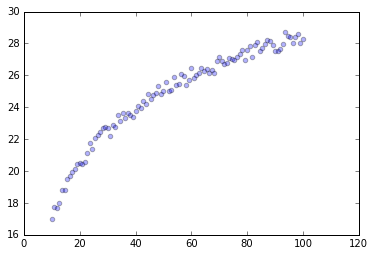

In [103]:
# ex4.1
N = 100

X = np.linspace(10, 100, N)
X = X.reshape(100,)

B0 = 5 
B1 = 5

epsilon = np.random.rand(N)

y = B0 + B1 * np.log(X) + epsilon
y = y.reshape(100,)

df = pd.DataFrame({'X':X, 'y':y})

%matplotlib inline
plt.scatter(X, y, alpha=.3)

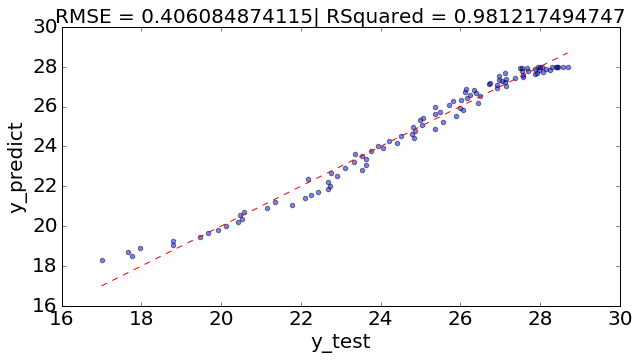

In [105]:
# polynomial model
polymod = smf.ols('y ~ X + I(X*X)', df)

polymodfit = polymod.fit()

y_predict = polymodfit.predict(df)
plot_predict(y, y_predict)

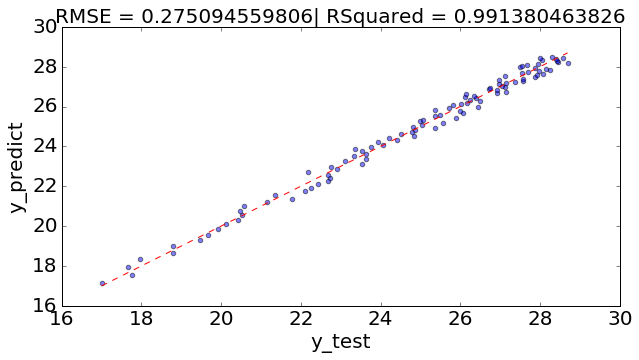

In [106]:
# log model
logmod = smf.ols('y ~ np.log(X)', df)

logmodfit = logmod.fit()

y_predict = logmodfit.predict(df)
plot_predict(y, y_predict)

In [52]:
# define error and plot fns
def RMSE(y_test, y_predict):
    RMSE = (sum((y_predict - y_test)**2)/len(y_test))**0.5
    return RMSE

def plot_predict(y_test, y_predict):
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    
    ax.scatter(y_test, y_predict, alpha = 0.5)
    ax.plot(np.linspace(np.min(y_test), np.max(y_test), 2), np.linspace(np.min(y_test), np.max(y_test), 2), 'r--')
    ax.set_xlabel('y_test', fontsize = 20)
    ax.set_ylabel('y_predict', fontsize = 20)   
    #ax.set_aspect("equal")
    ax.set_title(('RMSE = ' + str(RMSE(y_test, y_predict)) + '| RSquared = ' + str(calc_RSquared(y_test, y_predict))), fontsize = 20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    
def calc_RSquared(y_test, y_predict):
    SS_total = np.sum((y_test - np.mean(y_test))**2)
    SS_res = np.sum((y_test - y_predict)**2)
    return (1 - SS_res/SS_total)

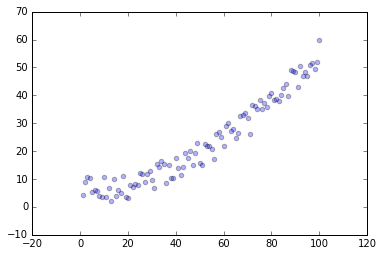

In [107]:
# ex4.2
N = 100

X = np.linspace(1, 100, N)
X = X.reshape(100,)

B0 = 1 
B1 = .0005
B2 = .005

epsilon = 10 * np.random.rand(N)

y = B0 + B1*X + B2*X*X + epsilon
y = y.reshape(100,)

df = pd.DataFrame({'X':X, 'y':y})

%matplotlib inline
plt.scatter(X, y, alpha=.3)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
df_train = pd.DataFrame({'X':X_train, 'y':y_train})
df_test = pd.DataFrame({'X':X_test, 'y':y_test})

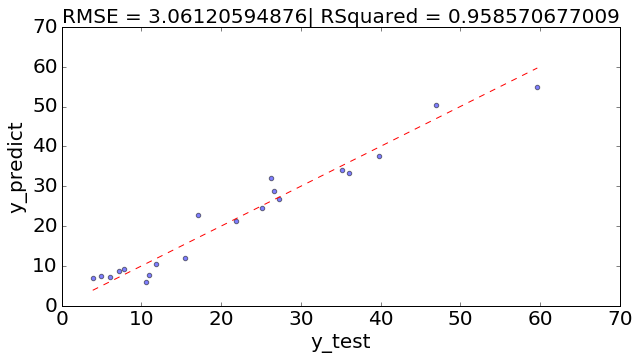

In [116]:
# polynomial model
polymod = smf.ols('y ~ X + I(X*X)', df_train)
polymodfit = polymod.fit()
y_predict = polymodfit.predict(df_test)
plot_predict(y_test, y_predict)

In [124]:
mean_squared_error(y_test, y_predict)

228.55847809136685

In [ ]:
# ex4.3

In [130]:
tre = []
tee = []
rsq = []
aic = []

In [139]:
# polynomial model
polymod = smf.ols('y ~ X + I(X**2) + I(X**3)  + I(X**4) + I(X**5)  + I(X**6) + I(X**7)', df_train)
polymodfit = polymod.fit()

y_predict = polymodfit.predict(df_train)
train_error = mean_squared_error(y_train, y_predict)
tre.append(train_error)

y_predict = polymodfit.predict(df_test)
test_error = mean_squared_error(y_test, y_predict)
tee.append(test_error)

R_sqaured = calc_RSquared(y_test, y_predict)
rsq.append(R_sqaured)

AIC = polymodfit.summary.im_self.aic
aic.append(AIC)

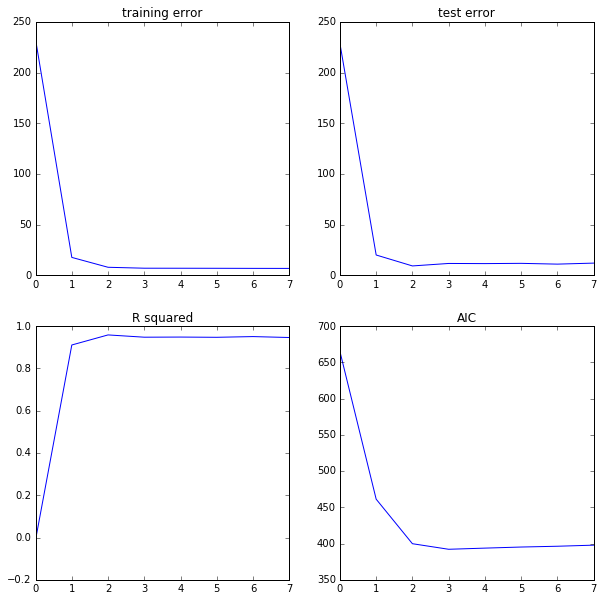

In [163]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax[0, 0].plot(tre)
ax[0, 0].set_title('training error')

ax[0, 1].plot(tee)
ax[0, 1].set_title('test error')

ax[1, 0].plot(rsq)
ax[1, 0].set_title('R squared')

ax[1, 1].plot(aic)
ax[1, 1].set_title('AIC')


In [194]:
# ex4.4

N = 100

X = np.linspace(1, 100, N)
X = X.reshape(100,)

B0 = 1 
B1 = .0005
B2 = .005

epsilon = 10 * np.random.rand(N)

y = B0 + B1*X + B2*X*X + epsilon
y = y.reshape(100,)

df = pd.DataFrame({'X':X, 'y':y})

train_error_m = []
test_error_m = []
test_perc = []

for test_percentage in (0.01 * np.array(range(5, 100, 5))):
    
    test_perc.append(test_percentage)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_percentage)
    df_train = pd.DataFrame({'X':X_train, 'y':y_train})
    df_test = pd.DataFrame({'X':X_test, 'y':y_test})

    # polynomial model
    polymod = smf.ols('y ~ X + I(X**2) + I(X**3)', df_train)
    polymodfit = polymod.fit()

    y_predict = polymodfit.predict(df_train)
    train_error = mean_squared_error(y_train, y_predict)
    train_error_m.append(train_error)

    y_predict = polymodfit.predict(df_test)
    test_error = mean_squared_error(y_test, y_predict)
    test_error_m.append(test_error)

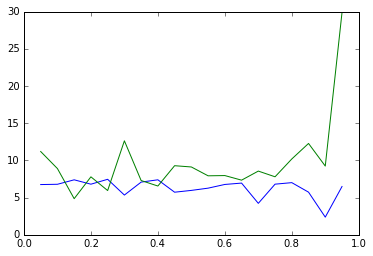

In [195]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_perc, train_error_m)
ax.plot(test_perc, test_error_m, 'g')